## 1. Instalação/Importação das bibliotecas

In [2]:
# Utilizando sistema de gerenciador de pacotes.
# Todos os pacotes utilizados na aplicação, é listado no arquivo 'requirements.txt'.
# É obrigatório a execução desta bloco de código antes de executar os demais blocos de códigos.
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib
import seaborn
import numpy as np

## 2. Preparação de Dados

In [4]:
# Atribuindo a variável 'principal' o arquivo .csv para tratabilidade
df = pd.read_csv(r'data\data.csv', sep=',', encoding='utf-8')
df.head()

,Unnamed: 0,Name,Company,Location,Description,preprocessed_salary
0,0,data scientist,"tantus technologies, inc.","woodlawn, md","tantus technologies, inc, tantus, - recognized...",137500.0
1,1,data scientist,rogue credit union,"medford, or",department: business intelligence and enterpri...,NaN
2,2,data scientist,knowbe4,"clearwater, fl",we are ranked 1 best place to work in technolo...,85000.0
3,3,data scientist,affinity solutions,"new york, ny","data scientistaffinity solutions, marketing cl...",114500.0
4,4,data scientist,pnnl,"richland, wa",. *organization and job id. *job description. ...,76500.0


In [5]:
# Renomeando as colunas para uma melhor visualização
df.columns = ['ID', 'Name', 'Company', 'Location', 'Description', 'Salary']
df.head()

,ID,Name,Company,Location,Description,Salary
0,0,data scientist,"tantus technologies, inc.","woodlawn, md","tantus technologies, inc, tantus, - recognized...",137500.0
1,1,data scientist,rogue credit union,"medford, or",department: business intelligence and enterpri...,NaN
2,2,data scientist,knowbe4,"clearwater, fl",we are ranked 1 best place to work in technolo...,85000.0
3,3,data scientist,affinity solutions,"new york, ny","data scientistaffinity solutions, marketing cl...",114500.0
4,4,data scientist,pnnl,"richland, wa",. *organization and job id. *job description. ...,76500.0


In [6]:
# Verificado que a coluna em questão está para contagem de linhas, a mesma foi retirada do dataframe
df.drop(['ID'], axis=1, inplace=True)
df.head()

,Name,Company,Location,Description,Salary
0,data scientist,"tantus technologies, inc.","woodlawn, md","tantus technologies, inc, tantus, - recognized...",137500.0
1,data scientist,rogue credit union,"medford, or",department: business intelligence and enterpri...,NaN
2,data scientist,knowbe4,"clearwater, fl",we are ranked 1 best place to work in technolo...,85000.0
3,data scientist,affinity solutions,"new york, ny","data scientistaffinity solutions, marketing cl...",114500.0
4,data scientist,pnnl,"richland, wa",. *organization and job id. *job description. ...,76500.0


In [7]:
# Chamando a coluna Salary para visualização dos dados em questão
df['Salary'].count()

2277

In [8]:
# Fazendo a contagem de quantos NaN conta dentro da coluna 'Salary'
df['Salary'].isna().sum()

12542

In [9]:
# Atribuindo 0 aos valores ausentes na coluna 'Salary'
df['Salary'] = df['Salary'].fillna(0, inplace=False)
df.head()

,Name,Company,Location,Description,Salary
0,data scientist,"tantus technologies, inc.","woodlawn, md","tantus technologies, inc, tantus, - recognized...",137500.0
1,data scientist,rogue credit union,"medford, or",department: business intelligence and enterpri...,0.0
2,data scientist,knowbe4,"clearwater, fl",we are ranked 1 best place to work in technolo...,85000.0
3,data scientist,affinity solutions,"new york, ny","data scientistaffinity solutions, marketing cl...",114500.0
4,data scientist,pnnl,"richland, wa",. *organization and job id. *job description. ...,76500.0


In [10]:
# Configuração para mostrar o conteúdo completo da coluna
pd.set_option('display.max_colwidth', None)

In [11]:
# Resetar para o tamanho padrão (50)
pd.reset_option('display.max_colwidth')

In [12]:
df

,Name,Company,Location,Description,Salary
0,data scientist,"tantus technologies, inc.","woodlawn, md","tantus technologies, inc, tantus, - recognized...",137500.0
1,data scientist,rogue credit union,"medford, or",department: business intelligence and enterpri...,0.0
2,data scientist,knowbe4,"clearwater, fl",we are ranked 1 best place to work in technolo...,85000.0
3,data scientist,affinity solutions,"new york, ny","data scientistaffinity solutions, marketing cl...",114500.0
4,data scientist,pnnl,"richland, wa",. *organization and job id. *job description. ...,76500.0
...,...,...,...,...,...
14814,"data scientist, mid,",btssoftwaresolutions,"washington, dc","data scientist, mid. education required. bache...",0.0
14815,senior data analyst,gapinc,"san francisco, ca",about gap inc. our past is full of iconic mome...,0.0
14816,"modeling analyst, mid-level,",usaa,"san antonio, tx",purpose of job. we are currently seeking a tal...,0.0
14817,chief data scientist,hrlegaladministration,"sartell, mn",job description. the opportunity. we are looki...,0.0


In [13]:
# Função para tratar uma string dividida por vírgulas
def tratar_string(arg):
    partes = arg.split(',')
    
    if len(partes) == 1:   # Se houver apenas uma parte, converte para título (primeira letra de cada palavra maiúscula)
        return partes[0].title()
    elif len(partes) == 2: # Se houver duas partes, converte a primeira para título e a segunda para maiúsculas (removendo espaços em branco desnecessários)
        return f"{partes[0].title()}, {partes[1].strip().upper()}"
    elif len(partes) == 3: # Se houver três partes, converte a primeira para título, a segunda e a terceira para maiúsculas (removendo espaços em branco desnecessários)
        return f"{partes[0].title()}, {partes[1].strip().upper()}, {partes[2].strip().upper()}"
    else:                  # Se houver mais de três partes, retorna a string original
        return arg

# Converte as colunas 'Name' e 'Company' para o formato de título
df['Name'] = df['Name'].str.title()
df['Company'] = df['Company'].str.title()
df['Location'] = df['Location'].apply(tratar_string)  # Aplica a função tratar_string à coluna 'Location' do DataFrame

df.head()

,Name,Company,Location,Description,Salary
0,Data Scientist,"Tantus Technologies, Inc.","Woodlawn, MD","tantus technologies, inc, tantus, - recognized...",137500.0
1,Data Scientist,Rogue Credit Union,"Medford, OR",department: business intelligence and enterpri...,0.0
2,Data Scientist,Knowbe4,"Clearwater, FL",we are ranked 1 best place to work in technolo...,85000.0
3,Data Scientist,Affinity Solutions,"New York, NY","data scientistaffinity solutions, marketing cl...",114500.0
4,Data Scientist,Pnnl,"Richland, WA",. *organization and job id. *job description. ...,76500.0


In [14]:
# Valores específicos da coluna 'Location' a serem excluídos
localizar = ['Toronto', 'Montreal', 'United States']
# Localizando os índices das linhas com base nos valores da coluna 'Location'
linha = df[df['Location'].isin(localizar)].index
# Excluindo as linhas pelos índices
df = df.drop(linha)

In [15]:
# Definindo uma função chamada 'Job' que categoriza trabalhos com base em palavras-chave
def Job(arg):
    # Dicionário de categorias e suas palavras-chave associadas
    keywords = {
        'Data Scientist': ['scientist', 'science', 'sceintist'],
        'Data Analyst': ['analyst', 'analytics', 'analysis', 'anaylst', 'intelligence', 'model',
                         'big data', 'visual', 'verif', 'report', 'special', 'platf'],
        'Data Engineer': ['engineer'],
        'Machine Learning': ['machine learning'],
        'Data Architect': ['architect'],
        'Statistician': ['math', 'statis'],
        'App Developer': ['devel'],
        'Data Researcher': ['research'],
        'Biologist': ['biolo'],
        'Data Mining': ['mining'],
        'Consultant': ['consult'],
        'Data Manager': ['manage'],
        'Data Strategy': ['strat']
    }
    # Convertendo a entrada para minúsculas para tornar a comparação de palavras-chave case-insensitive
    arg_lower = arg.lower()
    # Iterando sobre as categorias e suas palavras-chave associadas
    for category, keywords_list in keywords.items():   
        if any(keyword in arg_lower for keyword in keywords_list): # Verificando se pelo menos uma palavra-chave está presente na entrada
            return category
    # Se nenhuma correspondência é encontrada, retorna 'Others'
    return 'Others'

dfName = df['Name'].unique()    # Obtendo valores únicos da coluna 'Name' do DataFrame df
resultados = [Job(i) for i in dfName]   # Aplicando a função Job para categorizar os nomes dos trabalhos e armazenando os resultados
resultados_series = pd.Series(resultados).unique()  # Obtendo valores únicos da série de resultados
df_resultados = pd.DataFrame(resultados_series, columns=['Names'])  # Criando um DataFrame com os resultados

df_resultados

,Names
0,Data Scientist
1,Data Engineer
2,Data Analyst
3,Others
4,Data Manager
5,Data Architect
6,App Developer
7,Biologist
8,Data Researcher
9,Consultant


In [16]:
def Country(location):
    # Dicionário de mapeamento de estados para palavras-chave associadas
    state_mapping = {
        'Alabama, AL': ['alabama', 'huntsville', 'alabaster', 'birmingham', 'mobile', 'jefferson county', 'madison', 'montgomery'], 
        'Alaska, AK': ['alaska', 'anchorage'], 'Arizona, AZ': ['arizona', 'phoenix', 'tempe', 'scottsdale', 'chandler', 'gilbert',
        'mesa', 'dc ranch', 'luke afb'], 
        'Arkansas, AR': ['arkansas', 'rogers', 'little rock', 'bentonville', 'conway', 'mountain home'],
        'American Samoa, AS': ['american samoa'], 
        'California, CA': ['california', 'san jose', 'mountain view', 
        'san francisco', 'redlands', 'fremont', 'san diego', 'milpitas', 'palo alto', 'santa barbara', 'novato', 'santa fe springs',
        'los angeles', 'valencia', 'agoura hills', 'san rafael', 'concord', 'highland', 'burbank', 'carlsbad', 'scotts valley',
        'camarillo', 'irvine', 'woodland hills', 'redwood city', 'alameda', 'san ramon', 'monterey', 'fountain valley',
        'santa clara', 'torrance', 'brisbane', 'oakland', 'sunnyvale', 'san carlos', 'san mateo', 'clovis', 'menlo park', 'duarte',
        'encinitas', 'long beach', 'thousand oaks', 'universal city', 'anaheim', 'culver city', 'cerritos', 'santa monica', 'el segundo',
        'glendale', 'brea', 'westmont', 'pasadena', 'irwindale', 'calabasas', 'hermosa beach', 'whittier', 'northridge', 'marina del rey',
        'monaco', 'venice', 'sherman oaks', 'wilmington', 'monrovia', 'carson', 'seal beach', 'poway', 'la jolla', 'chula vista', 
        'national city', 'cupertino', 'union city', 'livermore', 'pleasanton', 'stanford', 'campbell', 'los gatos', 'los altos', 
        'parlier', 'pomona', 'orange', 'emeryville', 'foster city', 'aliso viejo', 'dublin', 'rancho cucamonga', 'costa mesa', 'lake forest',
        'west hollywood', 'walnut creek', 'vallejo', 'petaluma', 'sacramento', 'indio', 'jamul', 'columbia', 'gold river', 'century city',
        'sonoma', 'playa vista', 'santa cruz', 'seaside', 'redwood', 'temecula', 'rancho cordova', 'hollywood', 'ventura', 'roseville', 
        'newport beach', 'oxnard', 'fresno', 'malibu', 'davis', 'half moon bay', 'san bruno', 'san dimas', 'manhattan beach', 'ontario', 
        'diamond bar', 'silicon valley', 'santa ana', 'fullerton', 'elk grove', 'hawthorne', 'south berkeley', 'foothill ranch'], 
        'Colorado, CO': ['colorado', 'denver', 'longmont', 'boulder', 'aurora', 'arvada', 'englewood', 'vail', 'broomfield', 'westminster',
        'greenwood village', 'centennial', 'applewood', 'lone tree', 'loveland', 'lakewood', 'greeley', 'louisville', 'littleton',
        'lone tree', 'fort collins', 'loveland'],
        'Connecticut, CT': ['connecticut', 'groton', 'hartford', 'new haven', 'stamford', 'wilton', 'south windsor', 'enfield', 'glastonbury',
        'windsor', 'ridgefield', 'newington', 'shelton'], 
        'Delaware, DE': ['delaware', 'lewes', 'millville'], 'District of Columbia, DC': ['district of columbia'],
        'Florida, FL': ['florida', 'clearwater', 'fort lauderdale', 'miami lakes', 'miami', 'tampa', 'winter park', 'melbourne', 'tallahassee',
        'orlando', 'jacksonville', 'gainesville', 'west palm', 'boca raton', 'pensacola', 'bradenton', 'ocala', 'delray', 'deerfield',
        'saint petersburg', 'juno', 'lake mary', 'plantation', 'fort myers', 'medley', 'lake nona', 'pinellas park', 'palm', 'jupiter',
        'coral gables', 'davie', 'lakeland', 'dania', 'st petersburg', 'daytona', 'key west', 'estero'], 
        'Georgia, GA': ['georgia', 'atlanta', 'marietta', 'alpharetta', 'johns creek', 'peachtree city', 'augusta', 'oakwood', 'cartersville',
        'roswell', 'duluth', 'savannah', 'peachtree corners', 'kennesaw', 'smyrna', 'leesburg'], 
        'Guam, GU': ['guam'], 'Hawaii, HI': ['hawaii', 'honolulu', 'oahu island'], 'Idaho, ID': ['idaho', 'boise', 'meridian', 'victor', 'sandpoint'], 
        'Illinois, IL': ['illinois', 'chicago', 'kingdom', 'peoria', 'hoopeston', 'bloomington', 'schaumburg', 'evanston', 'melrose park',
        'lemont', 'rosemont', 'northbrook', 'elmhurst', 'downers grove', 'rolling meadows', 'naperville', 'maywood', 'oak brook',
        'des plaines', 'hines', 'evergreen park', 'bridgeview', 'libertyville', 'round lake', 'glenview', 'dekalb', 'time', 'glenview',
        'warrenville', 'scott afb', 'buffalo grove', 'champaign', 'westchester', 'mettawa', 'lake county', 'kankakee', 'campus', 'waukegan',
        'lake bluff', 'batavia', 'bradley', ], 'Indiana, IN': ['indiana', 'west lafayette', 'munster', 'lafayette', 'carmel', 'plainfield',
        'south bend', 'merrillville', 'evansville', 'calumet'], 
        'Iowa, IA': ['iowa', 'ames', 'pella', 'iowa','cedar rapids', 'des moines', 'clinton', 'grinnell', 'johnston'],
        'Kansas, KS': ['kansas', 'lenexa', 'olathe', 'leavenworth', 'mission', 'overland park', 'wichita', 'marion', 'topeka', 'leawood'], 
        'Kentucky, KY': ['kentucky', 'lexington', 'owensboro'], 'Louisiana, LA': ['louisiana', 'new orleans', 'pineville', 'baton rouge', 'opelousas',
        'new iberia'], 'Maine, ME': ['maine', 'cumberland foreside', 'portland', 'scarborough', 'paris'], 
        'Maryland, MD': ['maryland', 'woodlawn', 'linthicum heights', 'baltimore', 'suitland', 'landover', 'bethesda', 'rockville',
        'frederick', 'annapolis junction', 'gaithersburg', 'glen burnie', 'fort meade', 'linthicum', 'patuxent river', 'owings mills',
        'hanover', 'college park', 'bowie', 'germantown', 'millersville', 'edgewood', 'hunt valley', 'hyattsville', 'ellicott city',
        'annapolis', 'lutherville timonium', 'new market', 'aberdeen', 'aberdeen proving ground', 'upper marlboro', 'gwynn oak', 'hughesville'], 
        'Massachusetts, MA': ['massachusetts', 'cambridge', 'worcester', 'ipswich', 'marlborough', 'boston', 'framingham', 'north reading',
        'woburn', 'springfield', 'quincy', 'newton', 'natick', 'burlington', 'waltham', 'wellesley', 'watertown', 'holyoke', 'lakeville',
        'beverly', 'hanscom afb', 'stoughton', 'mansfield', 'newburyport', 'lynn', 'hingham', 'norwell', 'foxborough', 'attleboro',
        'roxbury', 'arlington', 'wilbraham', 'wakefield', 'southborough', 'somerville', 'northborough', 'rockland', 'billerica', 'westborough',
        'needham'],
        'Michigan, MI': ['michigan', 'southfield', 'dearborn', 'grand rapids', 'detroit', 'ann arbor', 'troy', 'lansing', 'livonia', 'jackson',
        'farmington hills', 'ada', 'northville', 'canton', 'walker', 'auburn hills', 'royal oak', 'farmington', 'portage', 'pontiac'], 
        'Minnesota, MN': ['minnesota', 'apple valley', 'minneapolis','saint paul', 'bemidji', 'eden prairie', 'minnetonka', 'plymouth',
        'minnetonka', 'sartell', 'st paul'], 'Mississippi, MS': ['mississippi', 'diamondhead', 'stennis space center', 'southaven'],
        'Missouri, MO': ['missouri', 'saint louis', 'creve coeur', 'grain valley', 'clayton', 'st. louis', 'ava', 'bridgeton', 'town and country',
        'fenton', 'st louis', 'ofallon'], 'Montana, MT': ['montana', 'great falls', 'laurel', 'bozeman', 'helena'], 
        'Nebraska, NE': ['nebraska', 'omaha', 'lincoln', 'pierce'],
        'Nevada, NV': ['nevada', 'las vegas', 'reno'], 'New Hampshire, NH': ['new hampshire', 'merrimack', 'portsmouth', 'nashua','dover'], 
        'New Jersey, NJ': ['new jersey', 'fort lee', 'newark', 'hamilton', 'mount olive', 'hoboken', 'woodbridge', 'matawan', 'ewing', 'jersey city',
        'edison', 'piscataway', 'middletown', 'florham park', 'summit', 'gloucester city', 'camden', 'cherry hill', 'pennsauken', 'red bank',
        'cresskill', 'belle mead', 'princeton junction', 'princeton', 'monmouth junction', 'bridgewater', 'peapack', 'township of warren',
        'hackensack', 'lawrenceville', 'hillsborough', 'whitehouse station', 'parsippany', 'basking ridge', 'woodcliff lake', 'secaucus',
        'short hills', 'iselin', 'weehawken', 'kenilworth', 'trenton', 'lawrence township', 'budd lake', 'pennington', 'avenel', 'branchville',
        'titusville', 'lyndhurst'],
        'New Mexico, NM': ['new mexino', 'albuquerque', 'santa fe'], 
        'New York, NY': ['new york', 'new hyde park,', 'armonk', 'ithaca', 'syracuse', 'amsterdam', 'albany', 'tarrytown', 'brooklyn', 'carle place',
        'queens village', 'buffalo', 'bronx', 'getzville', 'nyack', 'oneonta', 'white plains', 'manhattan', 'schenectady', 'ronkonkoma',
        'hicksville', 'port jefferson station', 'hamburg', 'long island city', 'purchase', 'sleepy hollow', 'elma', 'grand island', 'clifton park',
        'lake success', 'colonie', 'bethpage', 'painted post'], 
        'North Carolina, NC': ['north carolina', 'charlotte', 'durham', 'winston-salem', 'mooresville', 'raleigh', 'greensboro', 'wilson',
        'wake county', 'huntersville', 'morrisville', 'research triangle park', 'chapel hill', 'high point', 'cary', 'zebulon', 'elizabeth city',
        'cherryville', 'starmount', 'greer'],
        'North Dakota, ND': ['north dakota', 'fargo', 'bismarck'], 'Northern Mariana Islands, MP': ['northern mariana islands'],
        'Ohio, OH': ['ohio', 'bedford', 'brunswick', 'mentor', 'oincinnati', 'richfield', 'dayton', 'beavercreek', 'columbus', 'gahanna',
        'cincinnati', 'westlake', 'west jefferson, oh', 'westerville', 'lockbourne', 'slough', 'blacklick', 'hilliard', 'norwalk', 'brooklyn, oh',
        'cleveland', 'mayfield', 'valley view', 'mason', 'north canton', 'grove city', 'marysville, oh', 'piketon', 'colerain',
        'wright-patterson afb', 'fairfield', 'wickliffe', 'findlay', 'west chester, oh', 'athens', 'akron', 'franklin', 'ironton', 'toledo'], 
        'Oklahoma, OK': ['oklahoma', 'tulsa'], 
        'Oregon, OR': ['oregon', 'medford', 'hillsboro', 'corvallis', 'beaverton', 'tualatin', 'eugene', 'roseburg', 'post', 'bend', 'lake oswego',
        'sweet home', 'remote'], 
        'Pennsylvania, PA': ['Pennsylvania', 'philadelphia', 'coraopolis', 'pittsburgh', 'harrisburg', 'phila', 'collegeville', 'west reading',
        'king of prussia', 'newtown', 'blue bell', 'exton', 'valley forge', 'bala cynwyd', 'conshohocken', 'west chester', 'wayne', 'horsham',
        'boothwyn', 'bensalem', 'feasterville trevose', 'malvern', 'paoli', 'allegheny west', 'radnor', 'plymouth meeting', 'bristol', 'doylestown',
        'chester township', 'ridley park', 'west point', 'warminster', 'media', 'berwyn', 'norristown', 'north wales', 'oaks', 'audubon', 'trevose',
        'clearfield', 'flourtown', 'annville', 'warrendale', 'alburtis', 'ambler', 'bala-cynwyd', 'irwin', 'chester', 'etters', 'hershey', 'wexford',
        'mechanicsburg', 'state college', 'allison park', 'ivyland', 'langhorne', 'catawissa', 'elizabethtown', 'bryn mawr', 'danville', 'canonsburg'],
        'Puerto Rico, PR': ['puerto rico', 'juncos', 'san juan'], 'Rhode Island, RI': ['rhode island', 'providence', 'woonsocket'], 
        'South Carolina, SC': ['southc carolina', 'fort mill', 'spartanburg', 'greenville'], 'South Dakota, SD': ['south dakota', 'sioux falls'], 
        'Tennessee, TN': ['tennessee', 'chattanooga', 'nashville', 'oak ridge', 'knoxville', 'memphis', 'brentwood', 'maryville', 'greeneville',
        'hermitage'], 
        'Texas, TX': ['texas', 'dallas', 'plano', 'austin', 'houston', 'fort worth', 'burleson', 'irving', 'san antonio', 'alvin', 'stafford',
        'pearland', 'spring', 'sugar land', 'webster', 'baytown', 'nassau bay', 'west university place', 'bellaire', 'schertz', 'lackland afb',
        'allen', 'richardson', 'grapevine', 'grand prairie', 'addison', 'lewisville', 'coppell', 'farmers branch', 'carrollton', 'southlake',
        'round rock', 'west lake hills', 'cedar park', 'kyle', 'frisco', 'el paso', 'lufkin', 'garland', 'la porte', 'abilene', 'college station',
        'georgetown', 'italy', 'belton', 'laredo', 'forney', 'canyon'], 'Trust Territories, TT': ['trust territories'], 
        'Utah, UT': ['utah', 'hill afb', 'salt lake city', 'logan', 'riverton', 'sandy', 'midvale', 'draper', 'orem', 'lehi', 'american fork', 'provo'], 
        'Vermont, VT': ['vermont'], 'Virginia, VA': ['virginia', 'chantilly', 'herndon', 'mclean', 'vienna', 'ashburn', 'reston', 'richmond',
        'fort belvoir', 'alexandria', 'dulles', 'merrifield', 'crystal city', 'roanoke', 'falls church', 'sterling', 'norfolk', 'rosslyn', 'lynchburg',
        'hampton', 'quantico', 'aldie', 'fairfax', 'newport news', 'blacksburg', 'martinsville', 'tysons corner', 'oak hill', 'langley afb',
        'chesapeake', 'triangle'], 'Virgin Islands, VI': ['virgin islands'], 
        'Washington, WA': ['washington', 'richland', 'seattle', 'bellevue', 'tacoma', 'vancouver', 'woodinville', 'renton', 'bothell', 'olympia',
        'camas', 'everett', 'redmond', 'kirkland', 'pullman', 'issaquah', 'spokanev', 'spokane'], 
        'West Virginia, WV': ['west virginia', 'huntington', 'bridgeport'], 
        'Wisconsin, WI': ['wisconsin', 'milwaukee', 'sheboygan', 'green bay', 'neenah', 'beloit', 'wisconsin', 'monroe', 'de pere', 'oshkosh',
        'brookfield', 'marshfield', 'weston', 'middleton'], 
        'Wyoming, WY': ['wyoming', 'fort warren afb', 'cheyenne']
    }

    # Converte a localização para minúsculas para facilitar a comparação sem diferenciação de maiúsculas e minúsculas
    location_lower = location.lower()
    # Verifica se alguma palavra-chave na localização corresponde às palavras-chave do estado
    for state, keywords_list in state_mapping.items():
        if any(keyword in location_lower for keyword in keywords_list):
            return state # Retorna o estado se houver correspondência
    # Retorna a localização original se nenhuma correspondência for encontrada
    return location

# Obtém localizações únicas do DataFrame
df_locations = df['Location'].unique()
resultados = [Country(location) for location in df_locations]
resultados_series = pd.Series(resultados).unique()
df_resultados = pd.DataFrame(resultados_series, columns=['States'])

df_resultados

,States
0,"Maryland, MD"
1,"Oregon, OR"
2,"Florida, FL"
3,"New York, NY"
4,"Washington, WA"
5,"California, CA"
6,"Minnesota, MN"
7,"New Jersey, NJ"
8,"Illinois, IL"
9,"Texas, TX"


In [17]:
df['Name'] = df['Name'].apply(Job)
df['Location'] = df['Location'].apply(Country)

In [18]:
# list_science = [Science(row['Name'], row['Company'], row['Location'], row['Description'], row['Salary']) for index, row in df.iterrows()]

# Science.showById(list_science, 20000)
# Science.showAll(list_science, 2)

In [19]:
# Categorização de Dados
locations = df["Location"].unique()
companies = df["Company"].unique()
job_types = df["Name"].unique()

# Filtragem e Ordenação
def filter_by_salary(dataframe, min_salary):
    return dataframe[dataframe["Salary"] >= min_salary]

def sort_by_column(dataframe, column):
    return dataframe.sort_values(by=column)

# Exemplo de uso das funções
filtered_data = filter_by_salary(df, 100000.0)
sorted_data = sort_by_column(df, "Salary")

# print("Locations:", locations)
# print("Companies:", companies)
# print("Job Types:", job_types)
print("\nFiltered Data (Salary >= 100000):")
print(filtered_data)
print("\nSorted Data (by Salary):")
print(sorted_data)


Filtered Data (Salary >= 100000):
                 Name                    Company        Location  \
0      Data Scientist  Tantus Technologies, Inc.    Maryland, MD   
3      Data Scientist         Affinity Solutions    New York, NY   
6      Data Scientist                Logic20, 20  California, CA   
7      Data Scientist         Wings Financial Cu   Minnesota, MN   
8      Data Scientist                 , Intent,     New York, NY   
...               ...                        ...             ...   
13951  Data Scientist                  Regeneron    New York, NY   
13955  Data Scientist                  Regeneron    New York, NY   
13956  Data Scientist                  Genentech  California, CA   
13960  Data Scientist            Rbrtechnologies    Maryland, MD   
13961   Data Engineer                  Equianllc        Ohio, OH   

                                             Description    Salary  
0      tantus technologies, inc, tantus, - recognized...  137500.0  
3      dat

## 3. Análise Utilizando Listas

In [20]:
from model.ListaEncadeada import ListaEncadeada
from model.Node import Node
from model.Science import Science

In [21]:
# Objeto instanciado
list_job = ListaEncadeada()

# Primeiro iremos utilizar o método iterrows para transformar o nosso dateframe em uma
# lista de objetos iterativos e ser possível o acesso ao objeto com mais facilidade
for _, row in df.iterrows():
    obj = Node(Science(row["Name"], row["Company"], row["Location"], row["Description"], row["Salary"]))
    list_job.insert(obj)

In [22]:
# Exemplos de filtragens da nossa lista
list_filter_01 = list_job.filter(lambda x: x.Location == 'California, CA')
print("\nLista filtrada (Location == 'California, CA'):")
list_filter_01.show()


Lista filtrada (Location == 'California, CA'):
Name: Data Scientist, Company: Logic20, 20, Location: California, CA, Salary: 114000.0
Name: Data Scientist, Company: Wish, Location: California, CA, Salary: 163500.0
Name: Data Scientist, Company: H2O. Ai, Location: California, CA, Salary: 153500.0
Name: Data Scientist, Company: Nuna, Location: California, CA, Salary: 142500.0
Name: Data Scientist, Company: Esri, Location: California, CA, Salary: 107000.0
Name: Data Scientist, Company: Nuna, Location: California, CA, Salary: 142500.0
Name: Data Scientist, Company: Sartorius, Location: California, CA, Salary: 147500.0
Name: Data Engineer, Company: Lancer Insurance, Location: California, CA, Salary: 106000.0
Name: Data Scientist, Company: Intuit - Data, Location: California, CA, Salary: 185500.0
Name: Data Scientist, Company: Netskope, Location: California, CA, Salary: 154500.0
Name: Data Scientist, Company: Blue Owl, Location: California, CA, Salary: 0.0
Name: Data Scientist, Company: Log

In [23]:
list_filter_02 = list_job.filter(lambda x: x.Salary >= 160000)
print("\nLista filtrada (Salary >= 160.000):")
list_filter_02.show()


Lista filtrada (Salary >= 160.000):
Name: Data Scientist, Company: Wish, Location: California, CA, Salary: 163500.0
Name: Data Scientist, Company: Intuit - Data, Location: California, CA, Salary: 185500.0
Name: Data Scientist, Company: Visa Inc., Location: Washington, WA, Salary: 184500.0
Name: Data Scientist, Company: Biomarin Pharmaceutical, Location: California, CA, Salary: 168000.0
Name: Data Scientist, Company: Biomarin Pharmaceutical, Location: California, CA, Salary: 168000.0
Name: Data Scientist, Company: Genentech, Location: California, CA, Salary: 169000.0
Name: Data Scientist, Company: Intuit - Data, Location: California, CA, Salary: 183000.0
Name: Data Scientist, Company: Wish, Location: California, CA, Salary: 163500.0
Name: Data Scientist, Company: Grainger, Location: California, CA, Salary: 179500.0
Name: Data Scientist, Company: Western Digital, Location: California, CA, Salary: 171500.0
Name: Data Scientist, Company: Massmutual, Location: Massachusetts, MA, Salary: 16

In [24]:
list_filter_03 = list_job.filter(lambda x: x.Name == 'Data Scientist' or x.Name == 'Machine Learning')
print("\nLista filtrada (Name == 'Data Scientist' or 'Machine Learning'):")
list_filter_03.show()


Lista filtrada (Name == 'Data Scientist' or 'Machine Learning'):
Name: Data Scientist, Company: Tantus Technologies, Inc., Location: Maryland, MD, Salary: 137500.0
Name: Data Scientist, Company: Rogue Credit Union, Location: Oregon, OR, Salary: 0.0
Name: Data Scientist, Company: Knowbe4, Location: Florida, FL, Salary: 85000.0
Name: Data Scientist, Company: Affinity Solutions, Location: New York, NY, Salary: 114500.0
Name: Data Scientist, Company: Pnnl, Location: Washington, WA, Salary: 76500.0
Name: Data Scientist, Company: Clearone Advantage, Location: Maryland, MD, Salary: 73500.0
Name: Data Scientist, Company: Logic20, 20, Location: California, CA, Salary: 114000.0
Name: Data Scientist, Company: Wings Financial Cu, Location: Minnesota, MN, Salary: 101500.0
Name: Data Scientist, Company: , Intent, , Location: New York, NY, Salary: 140000.0
Name: Data Scientist, Company: Porch, Location: Washington, WA, Salary: 105500.0
Name: Data Scientist, Company: Tranzact, Location: New Jersey, N

In [25]:
# Exemplos de ordenação das nossas listas
list_filter_01 = list_filter_01.sort(key = lambda x: x.Salary, reverse = True)

print("\nLista ordenada por Salary em ordem decrescente:")
list_filter_01.show()


Lista ordenada por Salary em ordem decrescente:
Name: Data Scientist, Company: Sage Intacct, Location: California, CA, Salary: 232500.0
Name: Data Scientist, Company: Sageintacct, Location: California, CA, Salary: 232500.0
Name: Data Scientist, Company: Ca-One Tech Cloud, Location: California, CA, Salary: 225000.0
Name: Data Scientist, Company: Ca-One Tech Cloud, Location: California, CA, Salary: 225000.0
Name: Data Scientist, Company: Caonetechcloud, Location: California, CA, Salary: 225000.0
Name: Data Engineer, Company: Credit Sesame, Location: California, CA, Salary: 205000.0
Name: Data Engineer, Company: Credit Sesame, Location: California, CA, Salary: 205000.0
Name: Data Engineer, Company: Creditsesame, Location: California, CA, Salary: 205000.0
Name: Data Scientist, Company: The Climate Corporation, Location: California, CA, Salary: 194000.0
Name: Data Scientist, Company: The Climate Corporation, Location: California, CA, Salary: 194000.0
Name: Data Scientist, Company: Theclima

In [26]:
# Exemplos de ordenação das nossas listas
list_filter_02 = list_filter_02.sort(key = lambda x: x.Location)

print("\nLista ordenada por Location:")
list_filter_02.show()


Lista ordenada por Location:
Name: Data Scientist, Company: Wish, Location: California, CA, Salary: 163500.0
Name: Data Scientist, Company: Intuit - Data, Location: California, CA, Salary: 185500.0
Name: Data Scientist, Company: Biomarin Pharmaceutical, Location: California, CA, Salary: 168000.0
Name: Data Scientist, Company: Biomarin Pharmaceutical, Location: California, CA, Salary: 168000.0
Name: Data Scientist, Company: Genentech, Location: California, CA, Salary: 169000.0
Name: Data Scientist, Company: Intuit - Data, Location: California, CA, Salary: 183000.0
Name: Data Scientist, Company: Wish, Location: California, CA, Salary: 163500.0
Name: Data Scientist, Company: Grainger, Location: California, CA, Salary: 179500.0
Name: Data Scientist, Company: Western Digital, Location: California, CA, Salary: 171500.0
Name: Data Scientist, Company: Ca-One Tech Cloud, Location: California, CA, Salary: 225000.0
Name: Data Analyst, Company: Glassdoor, Location: California, CA, Salary: 162000.

In [27]:
# Exemplos de ordenação das nossas listas
list_filter_03 = list_filter_03.sort(key = lambda x: x.Location and x.Name)

print("\nLista ordenada por Location e em seguida por Name:")
list_filter_03.show()


Lista ordenada por Location e em seguida por Name:
Name: Data Scientist, Company: Tantus Technologies, Inc., Location: Maryland, MD, Salary: 137500.0
Name: Data Scientist, Company: Rogue Credit Union, Location: Oregon, OR, Salary: 0.0
Name: Data Scientist, Company: Knowbe4, Location: Florida, FL, Salary: 85000.0
Name: Data Scientist, Company: Affinity Solutions, Location: New York, NY, Salary: 114500.0
Name: Data Scientist, Company: Pnnl, Location: Washington, WA, Salary: 76500.0
Name: Data Scientist, Company: Clearone Advantage, Location: Maryland, MD, Salary: 73500.0
Name: Data Scientist, Company: Logic20, 20, Location: California, CA, Salary: 114000.0
Name: Data Scientist, Company: Wings Financial Cu, Location: Minnesota, MN, Salary: 101500.0
Name: Data Scientist, Company: , Intent, , Location: New York, NY, Salary: 140000.0
Name: Data Scientist, Company: Porch, Location: Washington, WA, Salary: 105500.0
Name: Data Scientist, Company: Tranzact, Location: New Jersey, NJ, Salary: 114

## 4. Análise Utilizando Árvores de Busca

In [28]:
from model.Science import Science
from model.BinaryTree import BinaryTree
from model.BinaryNode import BinaryNode

In [29]:
# Objeto instanciado
tree_job = BinaryTree()

# Primeiro iremos utilizar o método iterrows para transformar o nosso dateframe em uma
# lista de objetos iterativos e ser possível o acesso ao objeto com mais facilidade
for _, row in df.iterrows():
    obj = BinaryNode(Science(row["Name"], row["Company"], row["Location"], row["Description"], row["Salary"]))
    tree_job.insert(obj)
    if ('biol' in row["Name"].lower()):
        print(obj.data)

Name: Biologist, Company: Onethree Biotech, Location: New York, NY, Salary: 0.0
Name: Biologist, Company: Onethree Biotech, Location: New York, NY, Salary: 0.0
Name: Biologist, Company: Pfizer. 4. 1, Location: California, CA, Salary: 0.0
Name: Biologist, Company: Pfizer. 4. 1, Location: California, CA, Salary: 0.0
Name: Biologist, Company: La Jolla Institute For Allergy And Immunology. 4. 2, Location: California, CA, Salary: 0.0
Name: Biologist, Company: Chan Zuckerberg Initiative. 3. 4, Location: California, CA, Salary: 0.0
Name: Biologist, Company: Karius. 2. 3, Location: California, CA, Salary: 0.0
Name: Biologist, Company: Onethreebiotech, Location: New York, NY, Salary: 0.0


In [30]:
tree_job.total()

O total de nós inseridos na àrvore de busca é de: 14


In [31]:
print(tree_job.display_tree())

Data Scientist
├── Left: │   Data Engineer
│   ├── Left: │   │   Data Analyst
│   │   ├── Left: │   │   │   App Developer
│   │   │   └── Right: │   │   │       Biologist
│   │   │       └── Right: │   │   │           Consultant
│   │   └── Right: │   │       Data Architect
│   └── Right: │       Data Manager
│       └── Right: │           Data Researcher
│           ├── Left: │           │   Data Mining
└── Right:     Others
    ├── Left:     │   Data Strategy
    │   └── Right:     │       Machine Learning
    └── Right:         Statistician



In [32]:
# print("Inorder Traversal (Árvore de Busca Binária):", tree_job.display())

search_result = tree_job.search(lambda x: "A" in x.Name.lower())
if search_result:
    for i in search_result:
        print(i[0])
        # for k in i[0].instances:
        #     print(k[0].data)
        # job = i.data
        # print(f"Job found: {job.Name}, {job.Company}, {job.Location}, {job.Salary}")
else:
    print("Job not found.")

Checking node: Data Scientist
Condition met for node: Data Scientist
Going right
Checking node: Others
Condition met for node: Others
Going right
Checking node: Statistician
Condition met for node: Statistician
Going right


## 5. Análise Utilizando Grafos

In [33]:
dfWithSalary = df.copy()
dfWithSalary = dfWithSalary[dfWithSalary['Salary'] > 0]

Caminhos mais curtos para Data Scientist:


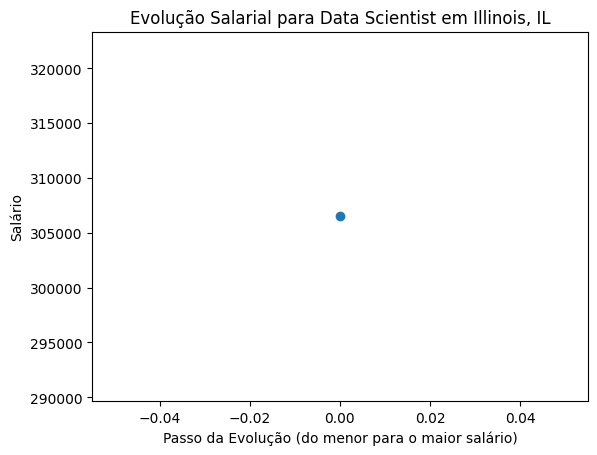

Salvo o gráfico para Data Scientist em Illinois, IL


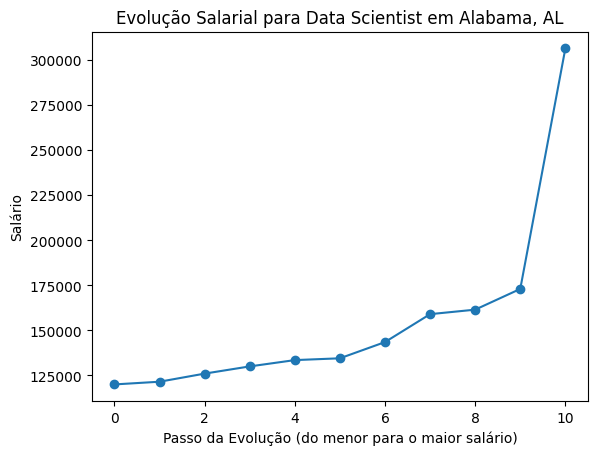

Salvo o gráfico para Data Scientist em Alabama, AL


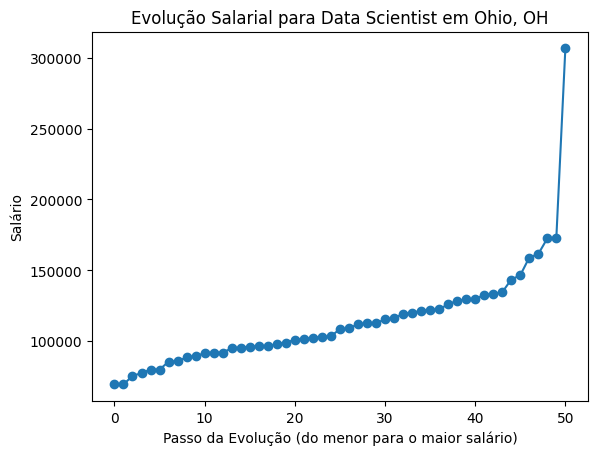

Salvo o gráfico para Data Scientist em Ohio, OH


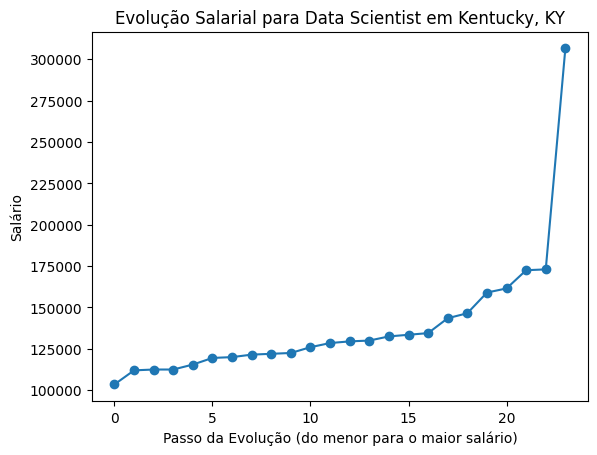

Salvo o gráfico para Data Scientist em Kentucky, KY


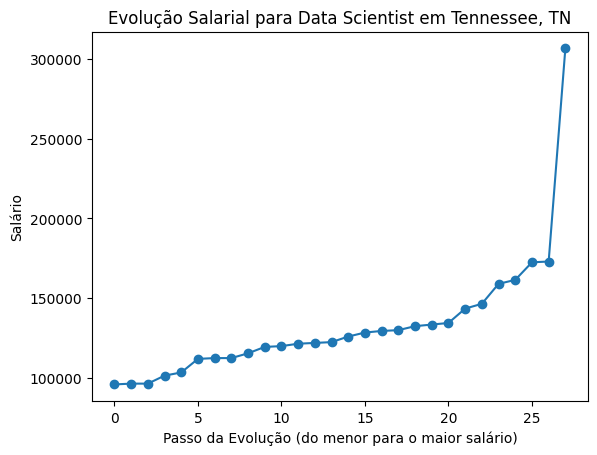

Salvo o gráfico para Data Scientist em Tennessee, TN


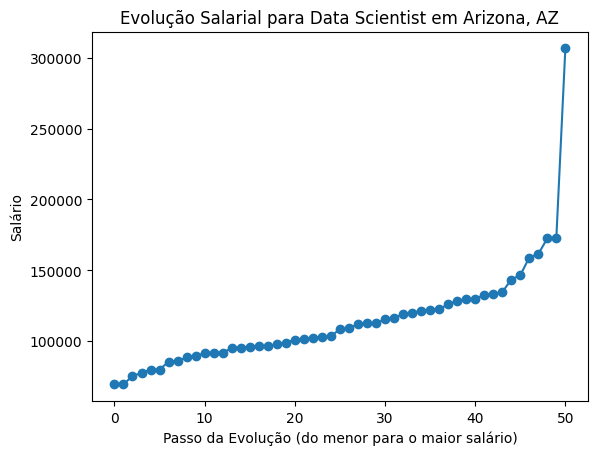

Salvo o gráfico para Data Scientist em Arizona, AZ


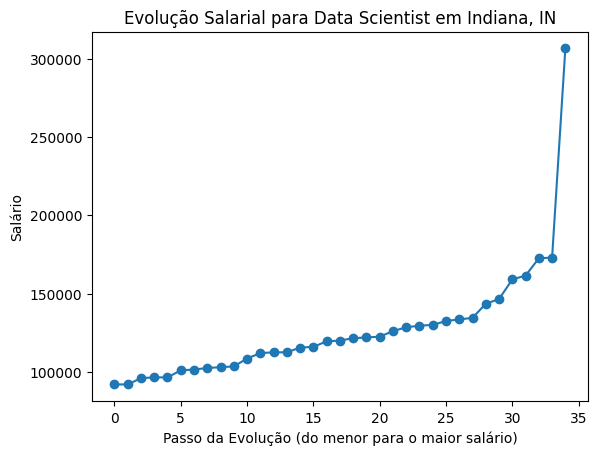

Salvo o gráfico para Data Scientist em Indiana, IN


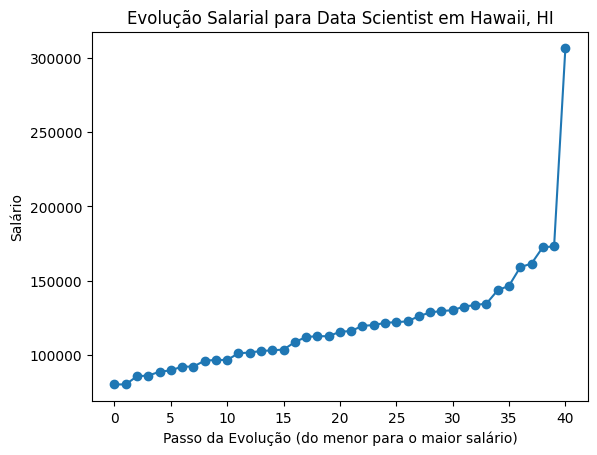

Salvo o gráfico para Data Scientist em Hawaii, HI


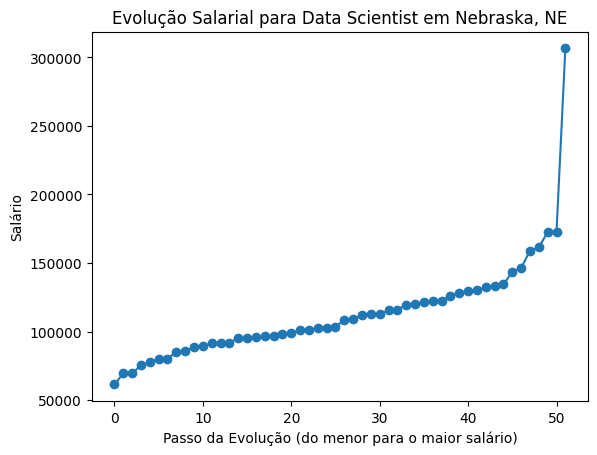

Salvo o gráfico para Data Scientist em Nebraska, NE


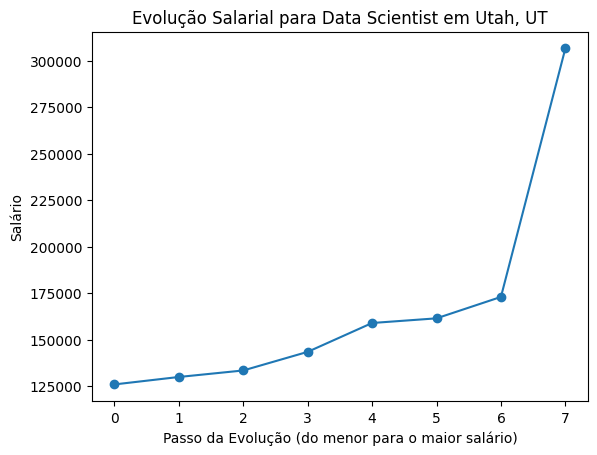

Salvo o gráfico para Data Scientist em Utah, UT


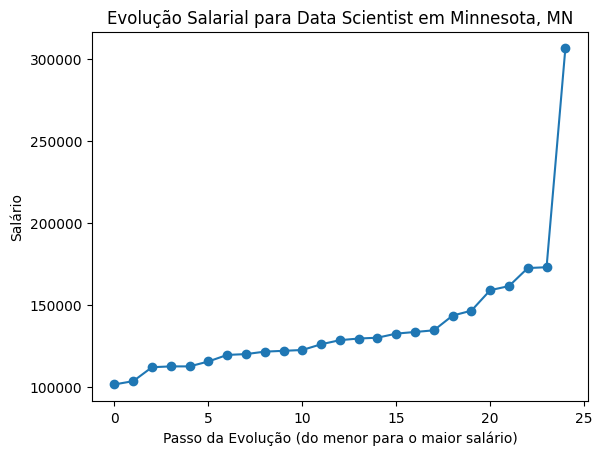

Salvo o gráfico para Data Scientist em Minnesota, MN


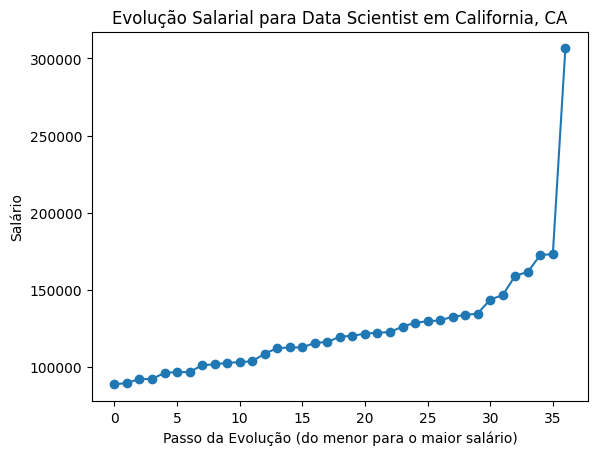

Salvo o gráfico para Data Scientist em California, CA


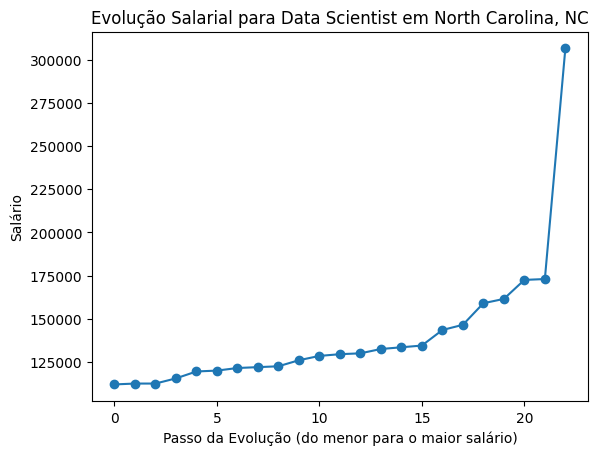

Salvo o gráfico para Data Scientist em North Carolina, NC


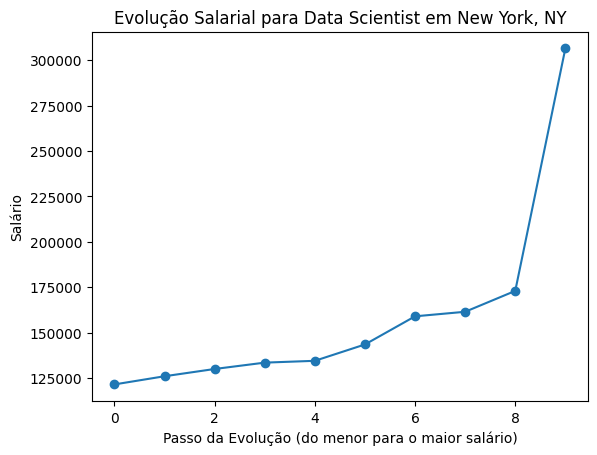

Salvo o gráfico para Data Scientist em New York, NY


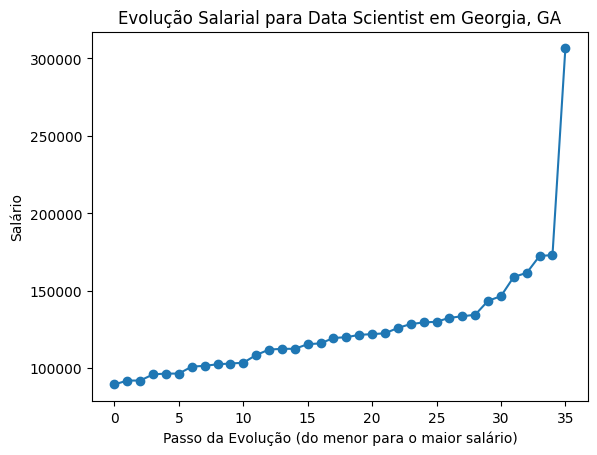

Salvo o gráfico para Data Scientist em Georgia, GA


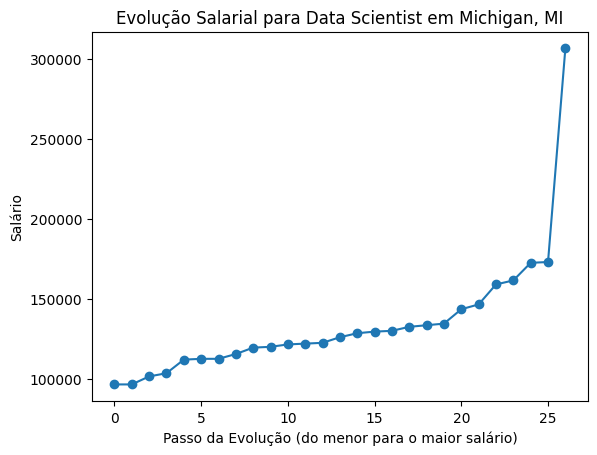

Salvo o gráfico para Data Scientist em Michigan, MI


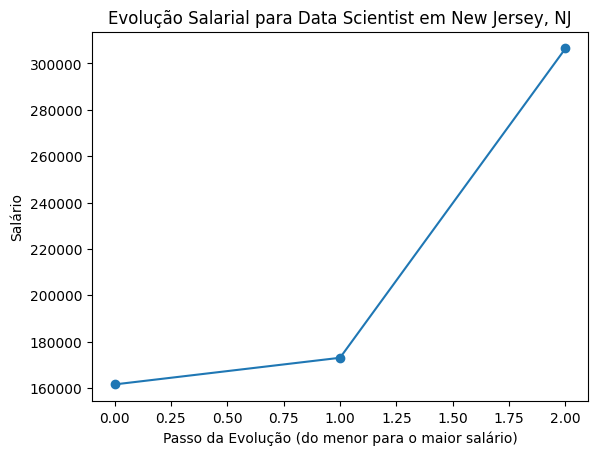

Salvo o gráfico para Data Scientist em New Jersey, NJ


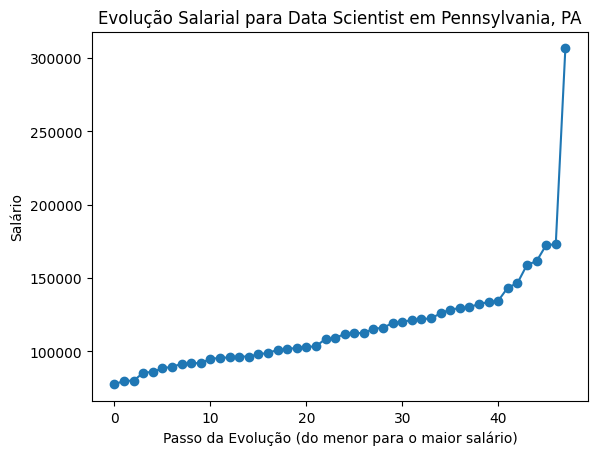

Salvo o gráfico para Data Scientist em Pennsylvania, PA


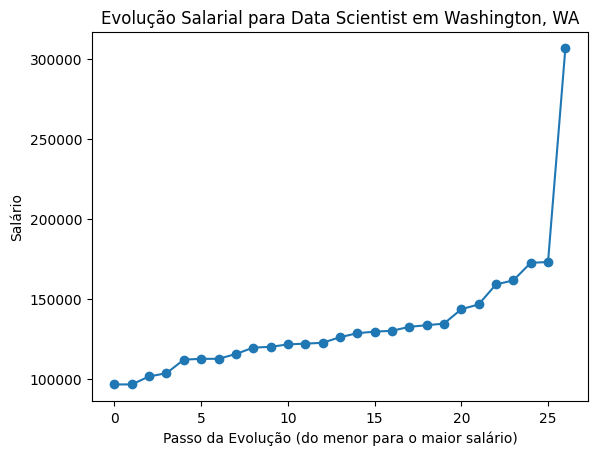

Salvo o gráfico para Data Scientist em Washington, WA


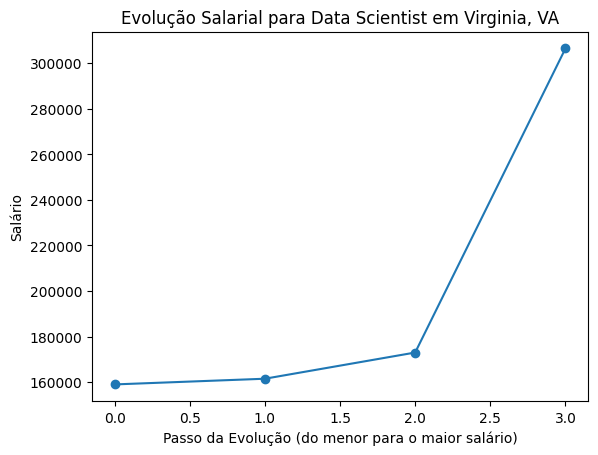

Salvo o gráfico para Data Scientist em Virginia, VA


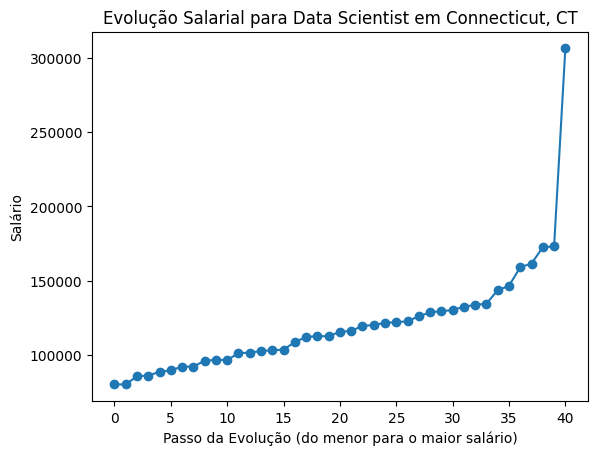

Salvo o gráfico para Data Scientist em Connecticut, CT


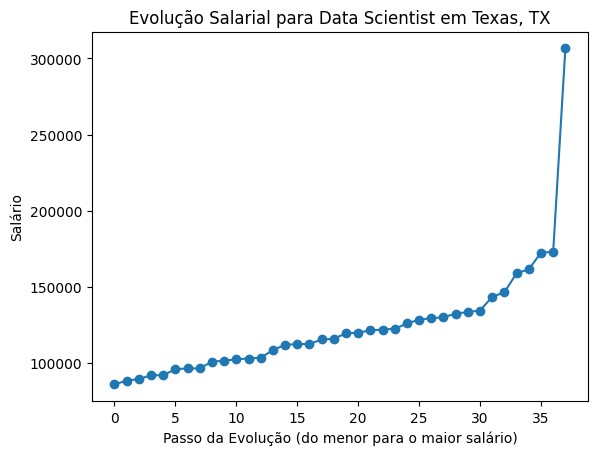

Salvo o gráfico para Data Scientist em Texas, TX


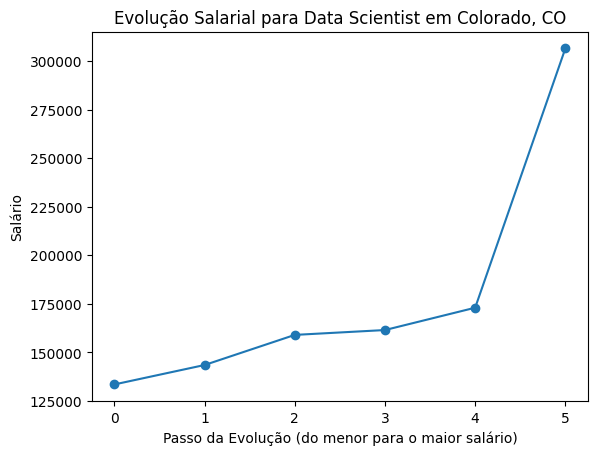

Salvo o gráfico para Data Scientist em Colorado, CO


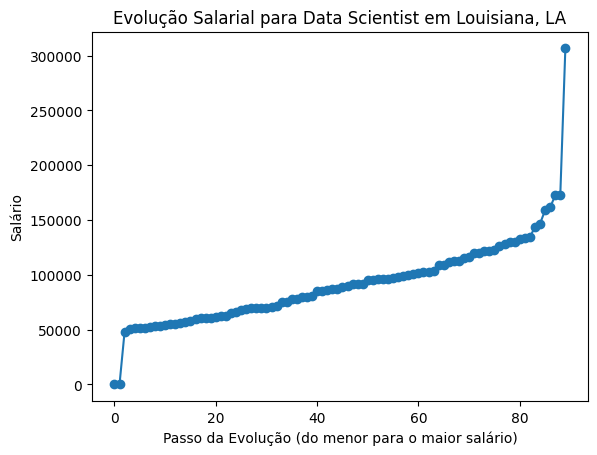

Salvo o gráfico para Data Scientist em Louisiana, LA


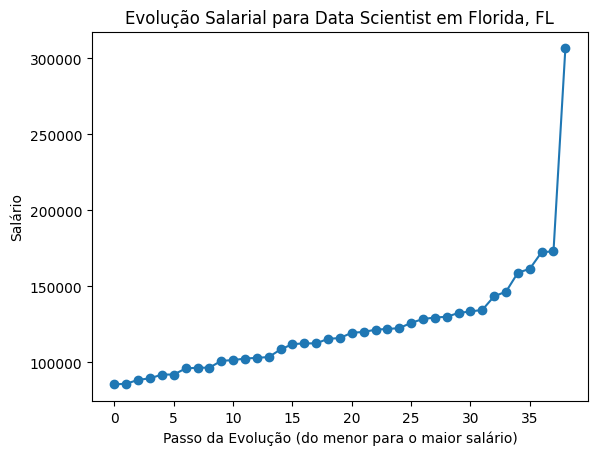

Salvo o gráfico para Data Scientist em Florida, FL


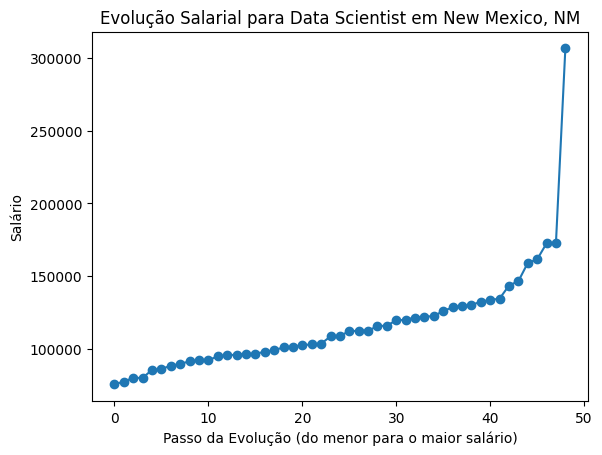

Salvo o gráfico para Data Scientist em New Mexico, NM


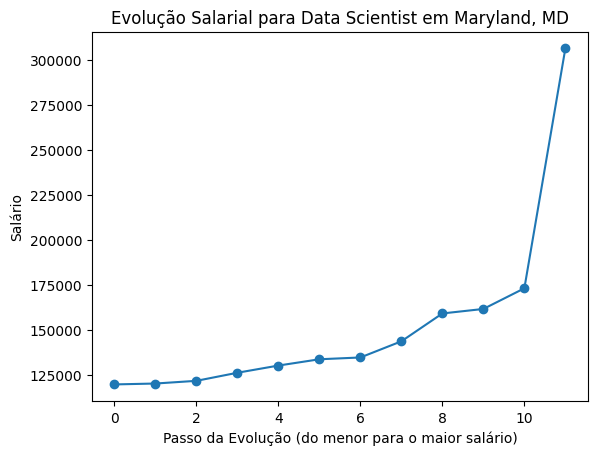

Salvo o gráfico para Data Scientist em Maryland, MD


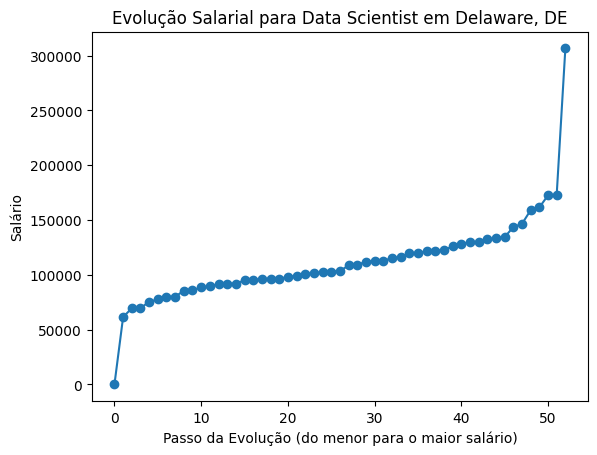

Salvo o gráfico para Data Scientist em Delaware, DE


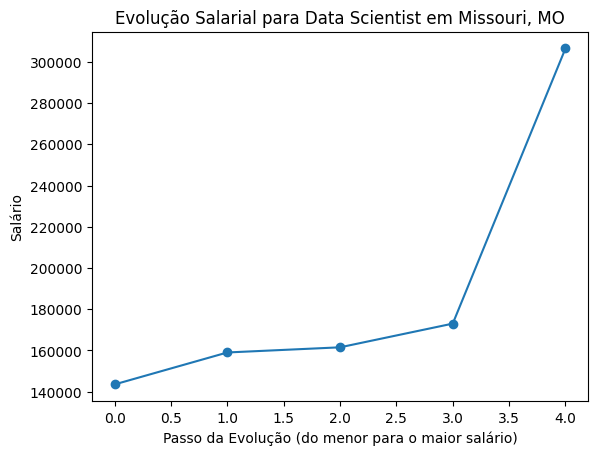

Salvo o gráfico para Data Scientist em Missouri, MO


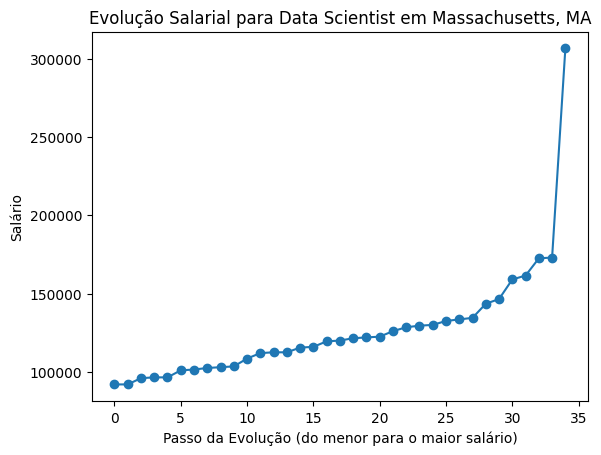

Salvo o gráfico para Data Scientist em Massachusetts, MA


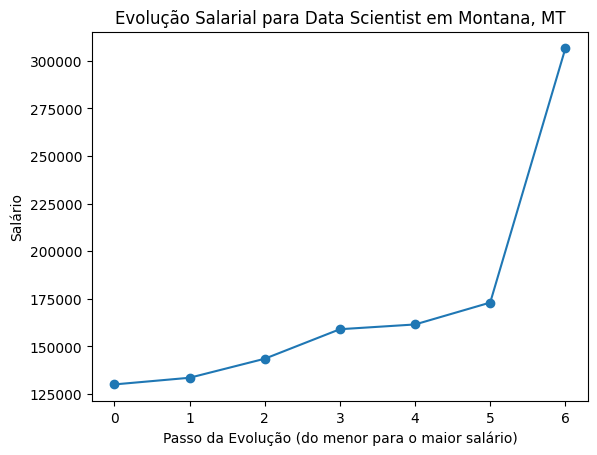

Salvo o gráfico para Data Scientist em Montana, MT


In [36]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

for _, row in dfWithSalary.iterrows():
    G.add_node((row["Name"], row["Location"]), company=row["Company"], salary=row["Salary"])

for node1 in G.nodes():
    for node2 in G.nodes():
        if node1 != node2 and node1[0] == node2[0] and G.nodes[node1]["salary"] <= G.nodes[node2]["salary"]:
            salary_diff = G.nodes[node2]["salary"] - G.nodes[node1]["salary"]
            G.add_edge(node1, node2, weight=salary_diff)

        if node1 != node2 and node1[1] == node2[1] and G.nodes[node1]["salary"] <= G.nodes[node2]["salary"]:
            salary_diff = G.nodes[node2]["salary"] - G.nodes[node1]["salary"]
            G.add_edge(node1, node2, weight=salary_diff)

def encontrar_caminho(profissao):
    if profissao in [name for name, _ in G.nodes()]:
        paths = []
        for location in set(location for _, location in G.nodes()):
            try:
                source_node = (profissao, location)
                if source_node in G.nodes():
                    shortest_path = nx.shortest_path(G, source=source_node, target=None, weight="weight", method="dijkstra")
                    paths.append((location, shortest_path))
            except nx.NetworkXNoPath:
                pass

        print(f"Caminhos mais curtos para {profissao}:")

        for location, shortest_path in paths:
            fig, ax = plt.subplots()
            evolution_data = [G.nodes[node]["salary"] for node in shortest_path]
            ax.plot(sorted(evolution_data), marker='o')
            ax.set(xlabel='Passo da Evolução (do menor para o maior salário)', ylabel='Salário',
                   title=f'Evolução Salarial para {profissao} em {location}')
            plt.show(f"{profissao}_{location}_evolution.png")
            plt.close()

            print(f"Salvo o gráfico para {profissao} em {location}")

    else:
        print("Profissão não encontrada no grafo.")

encontrar_caminho('Data Scientist')

## 6. Visualização de Dados